In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import main

In [37]:
## Start of Notebook

print('Starting Assignment 1')
RawData = main.ReadInData("../data/tcd ml 2019-20 income prediction training (with labels).csv")
print(RawData.shape)
print(RawData.describe())


Starting Assignment 1
(111993, 12)
            Instance  Year of Record            Age  Size of City  \
count  111993.000000   111552.000000  111499.000000  1.119930e+05   
mean    55997.000000     1999.421274      37.345304  8.388538e+05   
std     32329.738686       11.576382      16.036694  2.196879e+06   
min         1.000000     1980.000000      14.000000  7.700000e+01   
25%     27999.000000     1989.000000      24.000000  7.273400e+04   
50%     55997.000000     1999.000000      35.000000  5.060920e+05   
75%     83995.000000     2009.000000      48.000000  1.184501e+06   
max    111993.000000     2019.000000     115.000000  4.999251e+07   

       Wears Glasses  Body Height [cm]  Income in EUR  
count  111993.000000     111993.000000   1.119930e+05  
mean        0.500531        175.220192   1.092138e+05  
std         0.500002         19.913889   1.498024e+05  
min         0.000000         94.000000  -5.696906e+03  
25%         0.000000        160.000000   3.077169e+04  
50%    

In [38]:
## Dropping Features that are missing a large amount of data
## Dropping instances with missing data

RawData = main.HandleMissingData(RawData)

null_counts = RawData.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

37
1999.4212743832472
Number of null values in each column:
Year of Record       0
Gender               0
Age                  0
Country              0
Size of City         0
Profession           0
University Degree    0
Wears Glasses        0
Body Height [cm]     0
Income in EUR        0
dtype: int64


In [43]:
## Removing Outliers. Outliers being top and bottoms 2.5% 
## <<<METHOD TO BE REVALUATED>>>

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(Raw['Income in EUR']))
print(z)
print(z.shape)
count = []
index = []
for i in range(len(z)):
    if z[i] > 2:
        count.append(z[i])
        index.append(i)
        
RawData = RawData.drop(index)
print("Removing " + str(len(index)))
print("New Number of Instances: " + str(RawData.shape))

[0.32163766 0.12157727 0.32555287 ... 1.20651194 0.06119611 0.24480686]
(111993,)
Removing 4836
New Number of Instances: (107157, 10)


In [44]:
## Seeing the data and the unique values

for s in RawData.columns.values:
    print("Features in " + s)
    print(RawData[s].unique())
    print(len(RawData[s].unique()))


Features in Year of Record
[1997. 1996. 2018. 2006. 2010. 1991. 1982. 2008. 2015. 2019. 1981. 1989.
 2003. 1987. 1995. 1992. 1980. 1983. 2011. 2014. 1985. 2005. 1998. 2001.
 2017. 2007. 1988. 1994. 2012. 2009. 2013. 2004. 1999. 2002. 1993. 2000.
 1990. 2016. 1986. 1984.]
40
Features in Gender
['0' 'other' 'female' 'male' 'unknown']
5
Features in Age
[ 41.  28.  33.  46.  60.  71.  36.  43.  16.  51.  15.  22.  32.  40.
  31.  27.  25.  35.  63.  38.  34.  20.  23.  14.  37.  62.  52.  47.
  24.  26.  50.  49.  18.  19.  39.  66.  21.  44.  29.  64.  65.  53.
  78.  42.  58.  17.  30.  79.  48.  56.  83.  54.  74.  87.  67.  45.
  77.  55.  92.  80.  73.  90.  72.  70.  59.  61.  82.  57.  69.  98.
  94.  68.  97.  76.  75.  88.  91.  96.  84.  89. 107.  81.  85.  86.
 100. 110.  95.  99.  93. 104. 102. 101. 105. 111. 108. 103. 109. 106.
 115.]
99
Features in Country
['Belarus' 'Singapore' 'Norway' 'Cuba' 'United Arab Emirates' 'Liberia'
 'State of Palestine' 'Israel' 'South Sudan' 'Kyr

In [45]:
## Section to conver to binary matrix
## Changing Country, Profession

RawData_Country = pd.get_dummies(RawData.Country)
print(type(RawData_Country))
RawData_Profession = pd.get_dummies(RawData.Profession)
print(type(RawData_Profession))
RawData_Gender = pd.get_dummies(RawData['Gender'])
print(RawData_Gender.describe())
RawData_Uni = pd.get_dummies(RawData['University Degree'])
print(RawData_Uni.describe())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
                   0         female           male          other  \
count  107157.000000  107157.000000  107157.000000  107157.000000   
mean        0.006402       0.244072       0.380992       0.241291   
std         0.079755       0.429538       0.485633       0.427868   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             unknown  
count  107157.000000  
mean        0.127243  
std         0.333247  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  
                   0       Bachelor         Master             No  \
count  107157.000000  1071

In [46]:
RawData.describe()

,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR
count,107157.000000,107157.000000,1.071570e+05,107157.000000,107157.000000,107157.000000
mean,1999.169219,36.925353,8.393665e+05,0.499818,175.040688,85121.600816
std,11.524326,15.839779,2.202403e+06,0.500002,19.901972,81887.937644
min,1980.000000,14.000000,7.800000e+01,0.000000,94.000000,-5696.906419
25%,1989.000000,24.000000,7.258100e+04,0.000000,160.000000,29895.576020
50%,1999.000000,35.000000,5.041390e+05,0.000000,174.000000,54161.881970
75%,2009.000000,47.000000,1.183751e+06,1.000000,190.000000,111551.779900
max,2019.000000,115.000000,4.999251e+07,1.000000,265.000000,408757.438700


In [47]:
## Creating clean training data
print(RawData.columns)

RawData = pd.concat([RawData, RawData_Country], axis=1)
RawData= RawData.drop('Country', axis=1)
RawData = pd.concat([RawData, RawData_Profession], axis=1)
RawData= RawData.drop('Profession', axis=1)
RawData = pd.concat([RawData, RawData_Gender], axis=1)
RawData= RawData.drop('Gender', axis=1)
RawData = pd.concat([RawData, RawData_Uni], axis=1)
RawData= RawData.drop('University Degree', axis=1)

Index(['Year of Record', 'Gender', 'Age', 'Country', 'Size of City',
       'Profession', 'University Degree', 'Wears Glasses', 'Body Height [cm]',
       'Income in EUR'],
      dtype='object')


In [48]:
RawData.describe()

,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR,Afghanistan,Albania,Algeria,Angola,...,0,female,male,other,unknown,0,Bachelor,Master,No,PhD
count,107157.000000,107157.000000,1.071570e+05,107157.000000,107157.000000,107157.000000,107157.000000,107157.000000,107157.000000,107157.000000,...,107157.000000,107157.000000,107157.000000,107157.000000,107157.000000,107157.000000,107157.000000,107157.000000,107157.000000,107157.000000
mean,1999.169219,36.925353,8.393665e+05,0.499818,175.040688,85121.600816,0.000019,0.002940,0.000028,0.000149,...,0.006402,0.244072,0.380992,0.241291,0.127243,0.006019,0.385864,0.238995,0.309434,0.059688
std,11.524326,15.839779,2.202403e+06,0.500002,19.901972,81887.937644,0.004320,0.054139,0.005291,0.012219,...,0.079755,0.429538,0.485633,0.427868,0.333247,0.077350,0.486801,0.426472,0.462262,0.236909
min,1980.000000,14.000000,7.800000e+01,0.000000,94.000000,-5696.906419,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,24.000000,7.258100e+04,0.000000,160.000000,29895.576020,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1999.000000,35.000000,5.041390e+05,0.000000,174.000000,54161.881970,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,47.000000,1.183751e+06,1.000000,190.000000,111551.779900,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2019.000000,115.000000,4.999251e+07,1.000000,265.000000,408757.438700,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
## Output Training Data to new file
RawData.to_csv("../data/processedData4.csv", index=False)

In [50]:
## Read in new data and model

CleanData = main.ReadInData("../data/processedData4.csv")

In [51]:
CleanData.head(5)

,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR,Afghanistan,Albania,Algeria,Angola,...,0,female,male,other,unknown,0.1,Bachelor,Master,No.1,PhD
0,1997.0,41.0,1239930,0,193,61031.94416,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1996.0,41.0,1603504,0,186,91001.32764,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2018.0,28.0,1298017,1,170,157982.17670,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2006.0,33.0,751903,1,171,45993.75793,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2010.0,46.0,95389,0,188,38022.16217,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [52]:
income = CleanData['Income in EUR']
features = CleanData.drop(labels=['Income in EUR'], axis=1)

features.head(5)

,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Afghanistan,Albania,Algeria,Angola,Armenia,...,0,female,male,other,unknown,0.1,Bachelor,Master,No.1,PhD
0,1997.0,41.0,1239930,0,193,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1996.0,41.0,1603504,0,186,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2018.0,28.0,1298017,1,170,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2006.0,33.0,751903,1,171,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2010.0,46.0,95389,0,188,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [64]:
## Splitting Data

features_train, features_val, income_train, income_val = train_test_split(features, income, test_size=0.2, random_state=0)


In [54]:
## Using Linear Regression

model = LinearRegression()
model.fit(features_train, income_train)

print(model.coef_)
print(model.intercept_)

## Using Ridge Regression 
rig_model = Ridge()
rig_model.fit(features_train, income_train)

print(rig_model.coef_)
print(rig_model.intercept_)

## Using Random Forest Regression
RFR = RandomForestRegressor()
RFR.fit(features_train, income_train)


[ 1.43432073e+03  1.10936500e+03  1.21286088e-03 ... -1.43149411e+01
 -1.19446481e+04  5.82079791e+03]
-2756280.38847649


/Users/calebteo/python_env/CS4/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.3944e-18): result may not be accurate.
  overwrite_a=True).T
/Users/calebteo/python_env/CS4/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[ 1.42986747e+03  1.10573945e+03  1.20970751e-03 ... -1.19825022e+01
 -1.18835623e+04  5.83759290e+03]
-2757949.551552863


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
## Predict with the validation data

income_predict = model.predict(features_val)
comparison = pd.DataFrame({'Actual': income_val, 'Predicted': income_predict})

comparison

income_predict_rig = rig_model.predict(features_val)

income_predict_RFR = RFR.predict(features_val)

In [ ]:
## Graphing Difference 

df1 = comparison.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(income_val, income_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(income_val, income_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(income_val, income_predict)))

## Mean Absolute Error: 43557.00458896904 (FIRST SUBMISSION)
# Mean Squared Error: 7422065078.367375
# Root Mean Squared Error: 86151.40787223025

print('Mean Absolute Error:', metrics.mean_absolute_error(income_val, income_predict_rig))  
print('Mean Squared Error:', metrics.mean_squared_error(income_val, income_predict_rig))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(income_val, income_predict_rig)))

# Mean Absolute Error: 42800.374852794565 (SECOND SUBMISSION)
# Mean Squared Error: 6624261842.145419
# Root Mean Squared Error: 81389.56838652863

## With Gender and University Degree
## STANDARD
# Mean Absolute Error: 42683.66765298456
# Mean Squared Error: 6611260404.6631155
# Root Mean Squared Error: 81309.65751165796

## RIDGE
# Mean Absolute Error: 42466.72095408424 (THIRD SUBMISSION)
# Mean Squared Error: 6546309166.8984585
# Root Mean Squared Error: 80909.26502507892

print('Mean Absolute Error:', metrics.mean_absolute_error(income_val, income_predict_RFR))  
print('Mean Squared Error:', metrics.mean_squared_error(income_val, income_predict_RFR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(income_val, income_predict_RFR)))

## Random Forest Regressor
# Mean Absolute Error: 34068.166948849575
# Mean Squared Error: 6755748786.367559
# Root Mean Squared Error: 82193.36217948236

## Removing Outliers ----> OVERFITTING
# Linear
# Mean Absolute Error: 26118.321292148114
# Mean Squared Error: 1406257606.4580941
# Root Mean Squared Error: 37500.10141930411
# Ridge
# Mean Absolute Error: 26015.97955779054
# Mean Squared Error: 1400605950.6263156
# Root Mean Squared Error: 37424.67034759712
# Random Forest Regressor
# Mean Absolute Error: 23189.713212699877
# Mean Squared Error: 1596627069.3009887
# Root Mean Squared Error: 39957.81612276863

Mean Absolute Error: 26118.321292148114
Mean Squared Error: 1406257606.4580941
Root Mean Squared Error: 37500.10141930411
Mean Absolute Error: 26015.97955779054
Mean Squared Error: 1400605950.6263156
Root Mean Squared Error: 37424.67034759712
Mean Absolute Error: 23189.713212699877
Mean Squared Error: 1596627069.3009887
Root Mean Squared Error: 39957.81612276863


In [ ]:
## Read in Test and try to map
## Cell used to explore difference in Train data and Test data

TestData = main.ReadInData("../data/tcd ml 2019-20 income prediction test (without labels).csv")
TestData.head(5)


In [ ]:
## Comparing Training and Test (Country)
print(TestData['Country'].unique())
print("Test Shape " + str(len(TestData['Country'].unique())))
Raw = main.ReadInData("../data/tcd ml 2019-20 income prediction training (with labels).csv")
print(Raw['Country'].unique())
print("Raw Shape " + str(len(Raw['Country'].unique())))

print(TestData['Country'].equals(Raw['Country']))

## Test has less than 3 to Training

In [ ]:
## Comparing Training and Test (Profession)
print(TestData['Profession'].unique())
print("Test Shape " + str(len(TestData['Profession'].unique())))
print(Raw['Profession'].unique())
print("Raw Shape " + str(len(Raw['Profession'].unique())))

print(TestData['Profession'].equals(Raw['Profession']))

## Test Data has less 15 to Training

In [ ]:
## Comparing Training and Test (University Degree)
print(TestData['University Degree'].unique())
print("Test Shape " + str(len(TestData['University Degree'].unique())))
print(Raw['University Degree'].unique())
print("Raw Shape " + str(len(Raw['University Degree'].unique())))

print(TestData['University Degree'].equals(Raw['University Degree']))


In [ ]:
## Cell to Compare what is in Test and Trainning Data

Diff = pd.DataFrame(columns=['Unique_C_InTest', 'Unique_C_InTrain','Unique_P_InTest', 'Unique_P_InTrain'])

Diff = pd.DataFrame()
Diff['Unique_C_InTest'] = TestData["Country"][~TestData["Country"].isin(Raw["Country"])].drop_duplicates()
print(Diff['Unique_C_InTest'])
print(str(len(Diff['Unique_C_InTest'])))

Diff = pd.DataFrame()
Diff['Unique_P_InTest',] = TestData["Profession"][~TestData["Profession"].isin(Raw["Profession"])].drop_duplicates()
print(Diff['Unique_P_InTest',])
print(str(len(Diff['Unique_P_InTest',])))

Diff = pd.DataFrame()
Diff['Unique_C_InTrain'] = Raw["Country"][~Raw["Country"].isin(TestData["Country"])].drop_duplicates()
print(Diff['Unique_C_InTrain'])
print(str(len(Diff['Unique_C_InTrain'])))

Diff = pd.DataFrame()
Diff['Unique_P_InTrain'] = Raw["Profession"][~Raw["Profession"].isin(TestData["Profession"])].drop_duplicates()
print(Diff['Unique_P_InTrain'])
print(str(len(Diff['Unique_P_InTrain'])))


In [57]:
## Cell used to test MapColVarToMap
## Main Cell to Clean Test Data

Raw = main.ReadInData("../data/tcd ml 2019-20 income prediction training (with labels).csv")
test = main.ReadInData("../data/tcd ml 2019-20 income prediction test (without labels).csv")
test = main.HandleMissingData(test)
CleanTest = test.drop('Country', axis=1)
CleanTest = CleanTest.drop('Profession', axis=1)
CleanTest = CleanTest.drop('Gender', axis=1)
CleanTest = CleanTest.drop('University Degree', axis=1)
CleanTest = CleanTest.drop('Income', axis=1)

# Profession's NaN must be will with No, to allow function MapColVarToModelInput to sort columns
Raw = main.HandleMissingData(Raw)
z = np.abs(stats.zscore(Raw['Income in EUR']))
print(z)
print(z.shape)
count = []
index = []
for i in range(len(z)):
    if z[i] > 2:
        count.append(z[i])
        index.append(i)
        
Raw = Raw.drop(index)
print("Removing " + str(len(index)))
print("New Number of Instances: " + str(Raw.shape))

# Create 1st DF as copy. Create 2nd DF with encoding. Cat together

countryDf = main.MapColVarToModelInputs(Raw, test, 'Country')
professionDf = main.MapColVarToModelInputs(Raw, test, 'Profession')
genderDf = main.MapColVarToModelInputs(Raw, test, 'Gender')
uniDf = main.MapColVarToModelInputs(Raw, test, 'University Degree')

print(CleanTest.columns)
TestInputs = pd.concat([CleanTest, countryDf], axis=1)
TestInputs = pd.concat([TestInputs, professionDf], axis=1)
TestInputs = pd.concat([TestInputs, genderDf], axis=1)
TestInputs = pd.concat([TestInputs, uniDf], axis=1)
print(TestInputs.columns)

37
1999.5144306574348
37
1999.4212743832472
[0.32163766 0.12157727 0.32555287 ... 1.20651194 0.06119611 0.24480686]
(111993,)
Removing 4836
New Number of Instances: (107157, 10)
Index(['Year of Record', 'Age', 'Size of City', 'Wears Glasses',
       'Body Height [cm]'],
      dtype='object')
Index(['Year of Record', 'Age', 'Size of City', 'Wears Glasses',
       'Body Height [cm]', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Armenia',
       ...
       '0', 'female', 'male', 'other', 'unknown', '0', 'Bachelor', 'Master',
       'No', 'PhD'],
      dtype='object', length=1491)


In [ ]:
print(professionDf.head(5))
print(countryDf.head(5))
print(count)

In [59]:
TestInputs.to_csv("../data/processedTest_3.csv", index=False)

In [24]:
TestInputs = main.ReadInData('../data/processedTest_3.csv')

In [67]:
## Linear Regression

test_prediction = model.predict(TestInputs)
test_prediction

array([ 30460.78432093,  -6719.0664919 ,  47813.85420881, ...,
        76308.84725766, 193354.16086545, 169284.49607884])

In [68]:
submit = main.ReadInData('../data/tcd ml 2019-20 income prediction submission file.csv')
submit['Income'] = np.round(test_prediction, 2)
submit.head(5)

,Instance,Income
0,111994,30460.78
1,111995,-6719.07
2,111996,47813.85
3,111997,173472.09
4,111998,12529.37


In [69]:
submit.to_csv('../data/my_predictions_5.csv', index=False)

In [60]:
## Ridge Regression
test_prediction_rig = rig_model.predict(TestInputs)
print(test_prediction_rig)

submit = main.ReadInData('../data/tcd ml 2019-20 income prediction submission file.csv')
submit['Income'] = np.round(test_prediction_rig, 2)
submit.to_csv('../data/my_predictions_4.csv', index=False)

[ 30306.17713114  -5955.15932771  47938.62957372 ...  76283.22539897
 193243.08176544 169230.52591379]


In [2]:
Raw = main.ReadInData("../data/tcd ml 2019-20 income prediction training (with labels).csv")
Raw = main.HandleMissingData(Raw)


37
1999.4212743832472


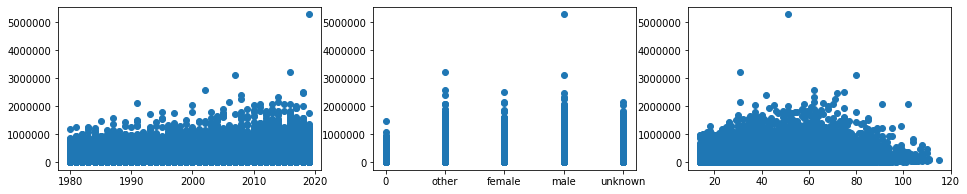

In [22]:
## Visualising

plt.figure(figsize=(16,3))

plt.subplot(131)
plt.scatter(x = Raw['Year of Record'], y = Raw['Income in EUR'])
plt.subplot(132)
plt.scatter(x = Raw['Gender'], y = Raw['Income in EUR'])
plt.subplot(133)
plt.scatter(x = Raw['Age'], y = Raw['Income in EUR'])
# plt.subplot(111)
# plt.scatter(x = Raw['Country'], y = Raw['Income in EUR'])
plt.show()

In [29]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(Raw['Income in EUR']))
print(z)
print(z.shape)
count = []
index = []
for i in range(len(z)):
    if z[i] > 2:
        count.append(z[i])
        index.append(i)
        
dropped = Raw.drop(index)

[0.32163766 0.12157727 0.32555287 ... 1.20651194 0.06119611 0.24480686]
(111993,)


(107157, 10)


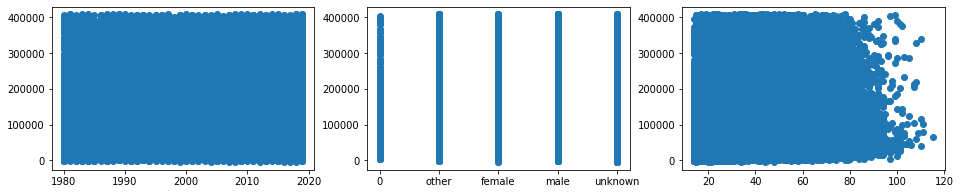

In [33]:
print(dropped.shape)
    
plt.figure(figsize=(16,3))

plt.subplot(131)
plt.scatter(x = dropped['Year of Record'], y = dropped['Income in EUR'])
plt.subplot(132)
plt.scatter(x = dropped['Gender'], y = dropped['Income in EUR'])
plt.subplot(133)
plt.scatter(x = dropped['Age'], y = dropped['Income in EUR'])
# plt.subplot(111)
# plt.scatter(x = Raw['Country'], y = Raw['Income in EUR'])
plt.show()